In [1]:
import os
from dotenv import load_dotenv
import pandas as pd
import yfinance as yf 
import requests
from alpha_vantage.timeseries import TimeSeries
import json
import datetime as dt

load_dotenv()



# def VWAP_data_requests(ticker='AMC', interval='60min'):
#     key = os.environ.get('alpha_VANTAGE_API')
#     json = requests.get(f'https://www.alphavantage.co/query?function=VWAP&symbol={ticker}&interval={interval}&outputsize=full&apikey={key}').json()
#     stock_df = pd.DataFrame(json['Technical Analysis: VWAP'])
#     stock_df = stock_df.transpose()
#     json2 = requests.get(f'https://www.alphavantage.co/query?function=TIME_SERIES_INTRADAY&symbol={ticker}&interval={interval}&outputsize=full&apikey={key}').json()
#     time_df = pd.DataFrame(json2[f'Time Series ({interval})']).transpose()
#     temp_list = []
#     for x in stock_df['VWAP']:
#         temp_list.append(x)
#     time_df['VWAP'] = temp_list
#     time_df = time_df.reset_index()
#     time_df = time_df.rename(columns={'index':'date'})
#     time_df.columns = ['Date', 'Open', 'High', 'Low', 'Close', 'Volume',
#         'VWAP']
#     time_df['Date'] = pd.to_datetime(time_df['Date'])
#     data = time_df.loc[time_df['Date']>dt.datetime.strptime('2021-02-04', '%Y-%m-%d')]
#     return data
# VWAP_data_requests()

In [131]:
key = os.environ.get('alpha_VANTAGE_API')
query_functions = ['VWAP', 'OBV']
# To interpret the OBV, look for the OBV to move with the price or precede price moves. If the price moves before the OBV, then it is a non-confirmed move. A series of rising peaks, or falling troughs, in the OBV indicates a strong trend. If the OBV is flat, then the market is not trending.

#VWAP - average price a security has traded at throughout the day, based on both volume and price. Therefore, when possible, institutions will try to buy below the VWAP, or sell above it. This way their actions push the price back toward the average, instead of away from it.

# Traders may use VWAP as a trend confirmation tool, and build trading rules around it. For example, when the price is above VWAP they may prefer to initiate long positions. When the price is below VWAP they may prefer to initiate short positions.

ticker='AMC'
interval='1min'
json2 = requests.get(f'https://www.alphavantage.co/query?function=TIME_SERIES_INTRADAY&symbol={ticker}&interval={interval}&outputsize=full&apikey={key}').json()
time_df = pd.DataFrame(json2[f'Time Series ({interval})']).transpose()
time_df.columns = [ 'Open', 'High', 'Low', 'Close', 'Volume']
for function in query_functions:
    json = requests.get(f'https://www.alphavantage.co/query?function={function}&symbol={ticker}&interval={interval}&outputsize=full&apikey={key}').json()
    stock_df = pd.DataFrame(json[f'Technical Analysis: {function}'])
    stock_df = stock_df.transpose()
    temp_list = []
    temp_list2 = []
    if function == 'STOCH':
        time_df = time_df.iloc[:len(stock_df['SlowK'])]
        for x in stock_df['SlowK']:
            temp_list.append(x)
        time_df['SlowK'] = temp_list
        for x in stock_df['SlowD']:
            temp_list2.append(x)
        time_df['SlowD'] = temp_list2
    else:
        for x in stock_df[f'{function}']:
            temp_list.append(x)
        time_df[f'{function}'] = temp_list
time_df = time_df.reset_index()
time_df = time_df.rename(columns={'index':'Date'})

time_df['Date'] = pd.to_datetime(time_df['Date'])
data = time_df.loc[time_df['Date']>dt.datetime.strptime('2021-02-04', '%Y-%m-%d')]
casts = [ 'Open', 'High', 'Low', 'Close', 'Volume','VWAP', 'OBV']
for cast in casts:
    data[f'{cast}'] = data[f'{cast}'].astype(float)
data['PriceDiff'] = data['Close'] - data['Open']
data

,Date,Open,High,Low,Close,Volume,VWAP,OBV,PriceDiff
0,2021-02-05 20:00:00,6.90,6.90,6.87,6.87,78379.0,7.2078,44170906.0,-0.03
1,2021-02-05 19:59:00,6.89,6.90,6.85,6.89,71285.0,7.2080,44249285.0,0.00
2,2021-02-05 19:58:00,6.90,6.90,6.89,6.90,18352.0,7.2081,44320570.0,0.00
3,2021-02-05 19:57:00,6.90,6.90,6.89,6.89,22332.0,7.2081,44302218.0,-0.01
4,2021-02-05 19:56:00,6.90,6.90,6.89,6.89,12591.0,7.2081,44302218.0,-0.01
...,...,...,...,...,...,...,...,...,...
1899,2021-02-04 04:05:00,8.73,8.85,8.73,8.73,8728.0,8.7907,68568170.0,0.00
1900,2021-02-04 04:04:00,8.75,8.75,8.61,8.73,13301.0,8.7944,68568170.0,-0.02
1901,2021-02-04 04:03:00,9.00,9.00,8.80,8.81,15017.0,8.8304,68581471.0,-0.19
1902,2021-02-04 04:02:00,8.72,9.00,8.72,9.00,10942.0,8.8022,68596488.0,0.28


In [132]:

minVWAP = data['VWAP'].min()
maxVWAP = data['VWAP'].max()
medianVWAP = str(data['VWAP'].median())

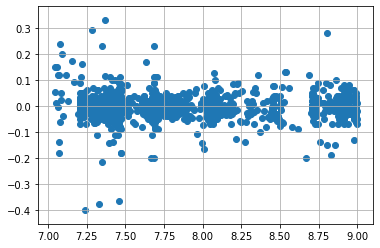

In [133]:
import matplotlib.pyplot as plt
import numpy as np
import math 
plt.scatter(data['VWAP'], data['PriceDiff'])
plt.grid()
plt.show()

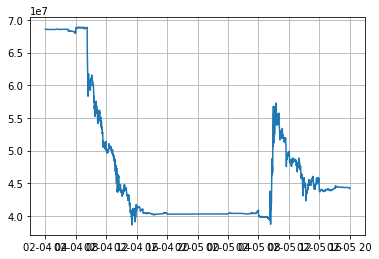

In [134]:

# plt.scatter(data['OBV'], data['PriceDiff'])
plt.plot(data['Date'], data['OBV'])
plt.grid()
plt.show()


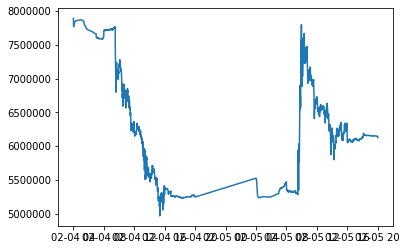

In [144]:

# plt.plot('Date','OBV', data=data)
data['maths'] = data['OBV']/data['VWAP']
plt.plot('Date','maths', data=data)
plt.show()

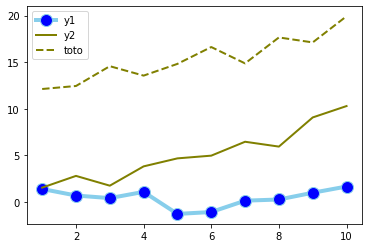

In [140]:
# libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
 
# Data
df=pd.DataFrame({'x': range(1,11), 'y1': np.random.randn(10), 'y2': np.random.randn(10)+range(1,11), 'y3': np.random.randn(10)+range(11,21) })
 
# multiple line plot
plt.plot( 'x', 'y1', data=df, marker='o', markerfacecolor='blue', markersize=12, color='skyblue', linewidth=4)
plt.plot( 'x', 'y2', data=df, marker='', color='olive', linewidth=2)
plt.plot( 'x', 'y3', data=df, marker='', color='olive', linewidth=2, linestyle='dashed', label="toto")
plt.legend()
